<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1205-Deep%20Learning%20TensorFlow-CNN-01~03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01. 합성곱 신경망**
- 합성곱 신경망(CNN: Convolutional Neural Network): 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
    - 이미지 분류(Image Classification) - 모델이 이미지의 특징을 추출해 분류할 수 있게 됨
    - 객체 탐지(Object Classification) - 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
    - 스타일 전이(Style Transfer) - 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

### 1-1 이미지 표현
- 이미지(또는 영상)를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함

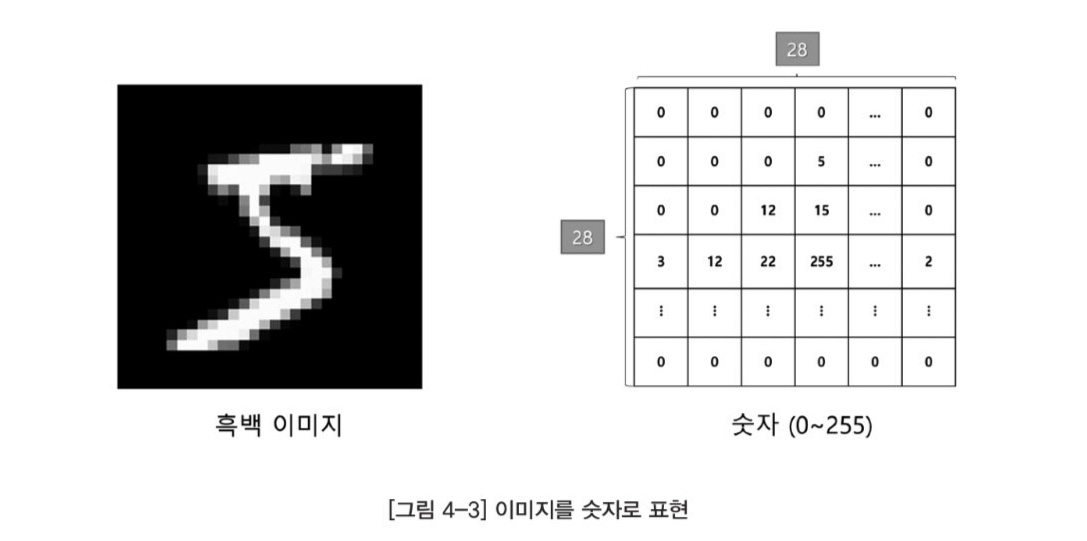
- 왼쪽에 있는 손글씨 이미지는 오른쪽 그림과 같이 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있음.
    - 숫자 0은 완전히 검은 색을 나타내고 숫자 255는 흰색을 나타냄. 그 중간에 있는 숫자들은 회색으로 표현됨
    - 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 이해할 수 있음
- 한편, 컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현함.
- 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타냄
    - 숫자가 클수록 해당 색상을 더 강하게 표현함
    - 여기서 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식임





### 1-2 합성곱(Convolution)
- 합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel) 15을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
- 특성맵(feature map): 합성곱 연산을 통해서 추출된 이미지
    - 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임

*이미지에 필터를 적용하는 합성곱 연산*
- 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력됨
- 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해 줌
- 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행하게 됨
- 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나옴
- 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫 번째 값이 됨
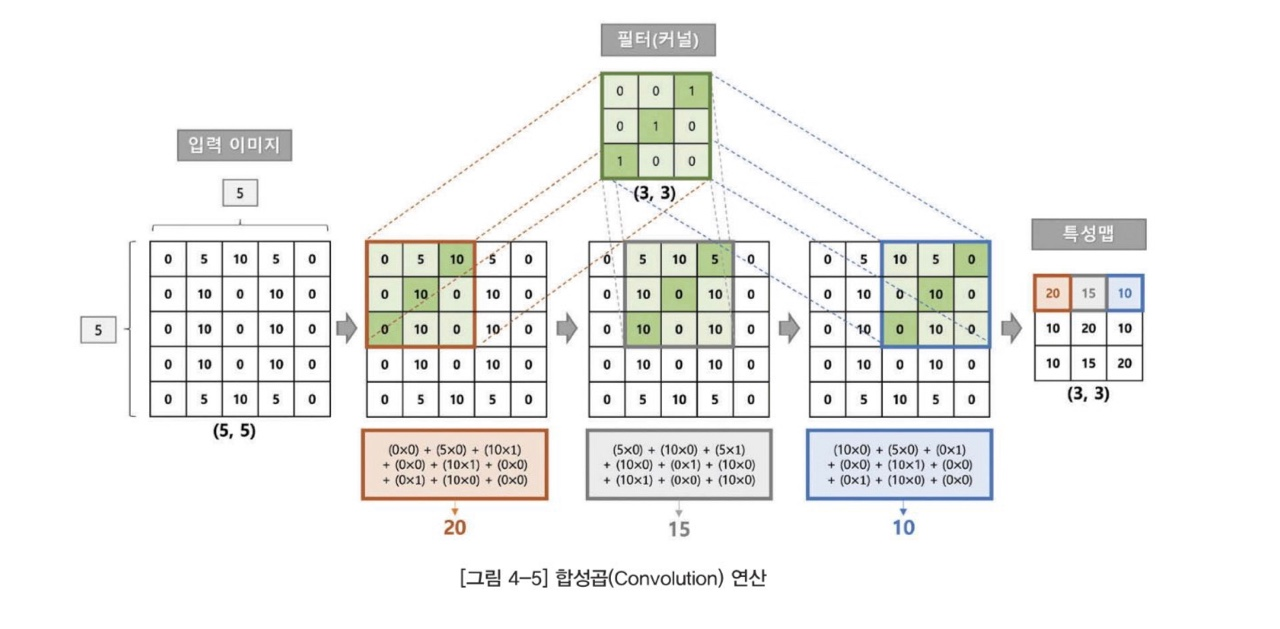
- 커널 사이즈가 3 × 3인 경우 총 9개의 가중치(weight)를 가지며 오차 역전파(back propagation) 시 커널의 가중치를 업데이트함
    - 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치(shared weights) 때문임
- 오차 역전파 시 커널의 그래디언트(gradient)를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있음


### 1-3 채널(channel)
- 채널은 입력 이미지를 구성하는 2차원 배열의 개수를 나타냄
- 앞서 살펴본 것처럼 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지임
- 하지만 컬러 이미지의 경우 R, G, B 3개의 채널을 가지는 이미지이므로 Red, Green, Blue 채널 이미지 3장이 겹쳐서 컬러 이미지로 표현됨
    - 컬러 이미지는 3개의 채널을 가지므로 세로 5픽셀, 가로 5픽셀의 컬러 이미지를 shape으로 나타냈을 때는 (5, 5, 3)으로 표현됨
- 컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 함
- 우선 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행함
- 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성됨

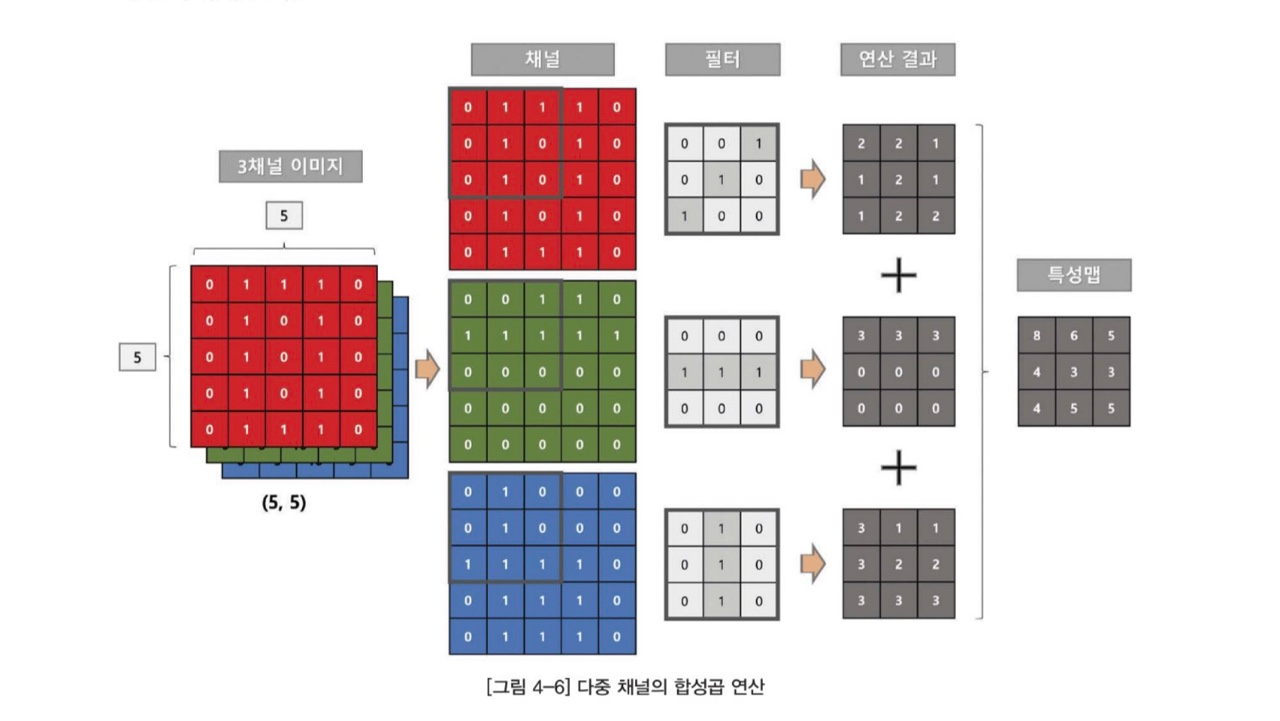

### 1-4 스트라이드(stride)
: 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는데, 이때 이동하는 간격
    - 주로 1 또는 2로 설정함
- 스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하여 추출함
- 스트라이드를 2로 설정하게 되면 2펠씩 건너뛰기 때문에 특성맵의 크기가 1/2로 줄어들게 됨  

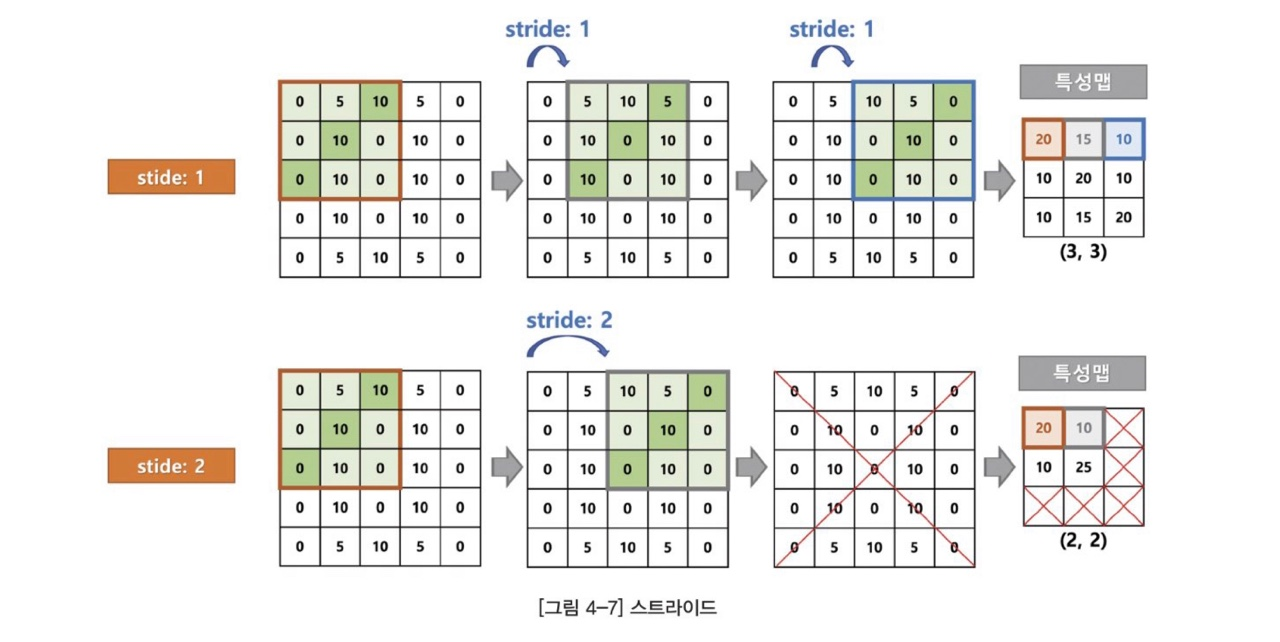
- 텐서플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드를 지정할 수 있음

### 1-5 패딩(padding)
- 커널 크기가 3 x 3이고, 스트라이드에서 1로 설정하게 되는 경우에도 추출된 특성맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀씩 줄어들게 됨
- 하지만 추출된 특성맵의 크기가 입력 이미 대비 줄어들지 않도록 패딩(padding)을 설정 가능함
- 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 됨
- 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음

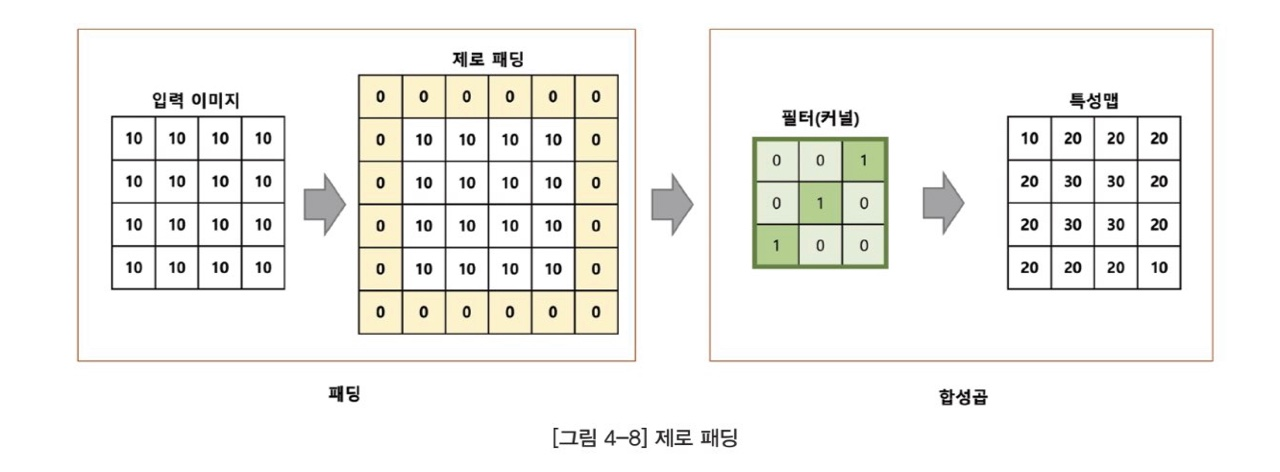
- 텐서플로 케라스의 Conv2D 레이어에서 padding = 'same'으로 설정하면 zero-padding을 적용함. 기본값은 padding = 'valid'임

### 1-6 특성맵(feature map) 사이즈
- 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식
$$ (Output Height, Output Width) = (\frac{Image \space Height + 2P - Kernel \space Height}{S} + 1, \frac{Image \space Width + 2P - Kernel \space Width}{S} + 1) $$
-   - Image Height, Image Width: 입력 크기(input size)
    - Kernel Height, Kernel Width: 필터 크기(kernel size)
    - S: 스트라이드(strides)
    - P: 패딩(padding)
    - Output Height, Output Width: 출력 크기(ouput size)

### 1-7 풀링(pooling)
- 풀링(pooling) 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어임
    - 풀링 레이어를 사용하면서 얻을 수 있는 이점으로는 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합 (overfitting)을 방지함에 있음
- 풀링 레이어는 크게 최대 풀링 (max pooling)과 평균 풀링 (average pooling)으로 나뉨.
    - 최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며 생각보다 좋은 성능을 발휘하기 때문에 합성곱 신경망과 같이 주로 사용됨

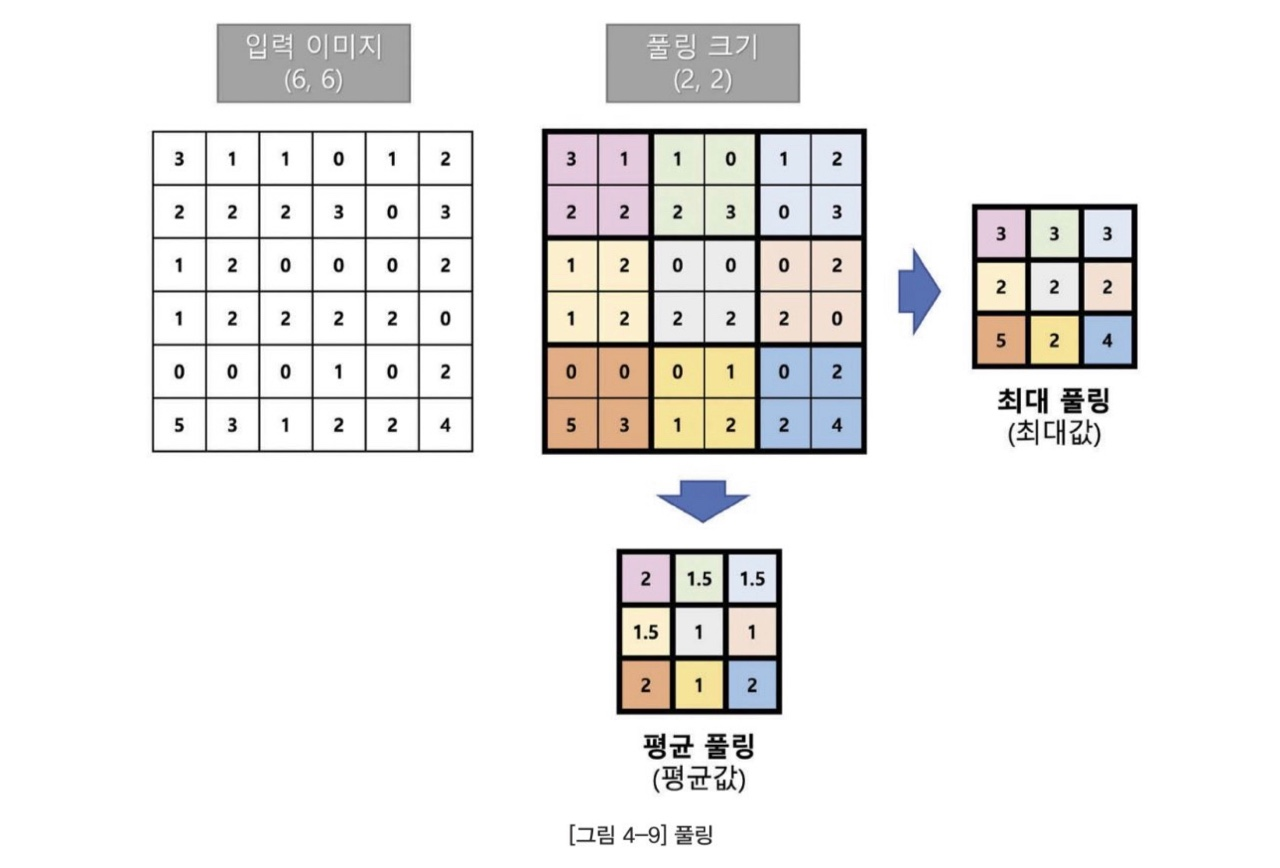
- 최대 풀링 수행 시 커널의 크기가 2 x 2로 주어질 때 입력 이미지의 2 x 2 픽셀 중 최대값이 출력 값으로 선택됨. 평균 풀링을 수행하면 2 x 2 픽셀들의 평균 값이 출력 값으로 나옴
- 풀링 레이어도 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면, 2칸씩 건너뛰면서 풀링을 수행함. 최대 풀링의 커널 크기를 2 x 2로 설정하고 스트라이드를 2로 설정 시 출력 이미지는 입력 이미지 대비 세로 1/2, 가로 1/2로 줄어들어 입력 이미지 대비 총 1/4 크기로 줄어듦

## **02. 간단한 모델 생성**

### 2-1 데이터 로드 및 전처리

In [ ]:
# tensorflow 모듈 import 
import tensorflow as tf

In [ ]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 훈련 셋의 첫 번째(인덱스 0) 이미지 출력

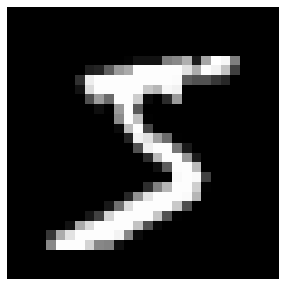

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


&rarr; 이미지 픽셀이 0~255 범위의 숫자로 구성된 것을 파악할 수 있음

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성됨
- CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해 줌
- tf.newaxis 축을 텐서 배열에 직접 추가하는 방식

In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습
- Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만듦
- 최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐줌
- 합성곱은 Conv2D 레이어를 사용하고 (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용함

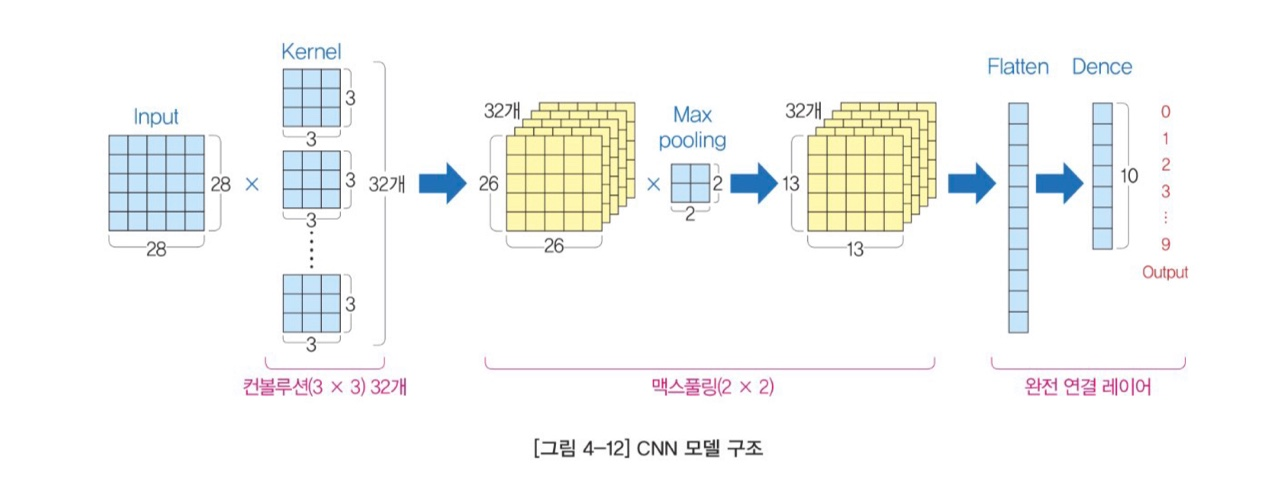
- 풀링 레이어는 (2, 2) 크기로 최대 풀링 (max pooling)을 적용하고, 레이어 이름 속성도 추가해 줌
- 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 하고, 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax를 적용함

In [ ]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

- 앞서 정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일하면 모델 인스턴스가 생성됨
- fit() 메소드에 훈련 셋과 검증 셋을 주입하고, epoch를 10으로 지정

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2135 - accuracy: 0.9402 - val_loss: 0.0969 - val_accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0815 - accuracy: 0.9763 - val_loss: 0.0709 - val_accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.0575 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0501 - accuracy: 0.9854 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0550 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0542 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0555 - accuracy: 0.9838


[0.05549333989620209, 0.9837999939918518]

- 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행

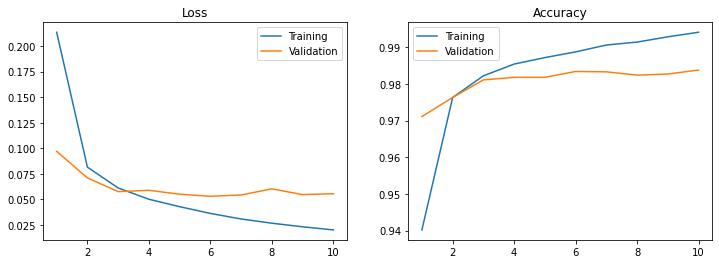

In [ ]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    axes[0].plot(range(1, epoch+1), loss, label='Training')
    axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label='Training')
    axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

- &rarr; 그래프를 보면 훈련 셋에 대한 손실은 계속 줄어드는데 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않음. 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 파악할 수 있음

### 2-3 모델 구조 파악
- summary() 메소드를 적용해 주면, 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있음
- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환됨. (3, 3) 크기의 합성곱 필터를 사용하기 때문에 이미지 가로, 세로 크기가 2씩 줄어듦(여기서 패딩은 적용되지 않음)
- 서로 다른 32개의 필터를 적용했기 때문에 (26, 26) 크기의 특성맵이 32개 생성됨
    - 즉, (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)를 추출하는 것

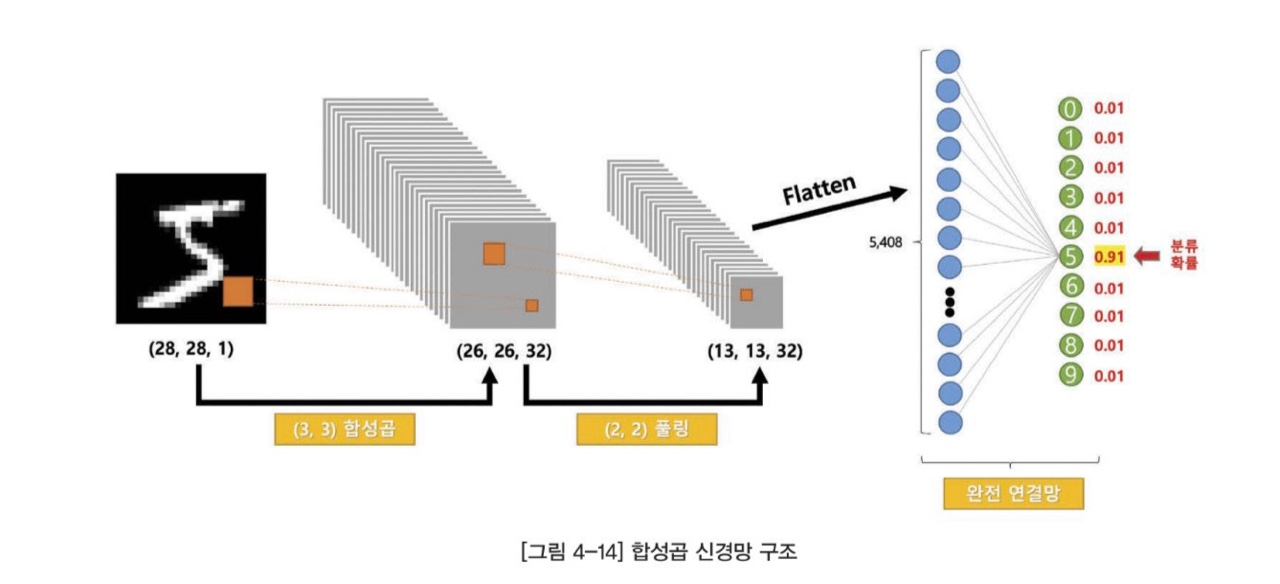
- (2, 2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어듦
- 따라서 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환되고, Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개(13 x 13 x 32) 원소를 갖는 1차원 벡터가 됨
- 이 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력
    - 즉, 이미지를 입력받아 특징을 추출하고 이미지가 나타내는 숫자를 예측할 수 있음

In [ ]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

&rarr; 가장 앞에 있는 축(axis=0)의 None 값: 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미

In [ ]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

&rarr; 10개의 노드를 갖는 1차원 벡터 형태임

In [ ]:
# 레이어 
model.layers

&rarr; 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

In [ ]:
# 첫 번째 레이어 선택
model.layers[0]

In [ ]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

&rarr; 앞의 Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어감 

In [ ]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

&rarr; Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어남

In [ ]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.8146333 ,  0.09886026, -0.60859036,  0.30207774,
           -0.13512456,  0.26515847, -0.23898596, -0.47411177,
           -0.9928547 ,  0.19840495,  0.00721002,  0.00476466,
           -0.7714029 ,  0.00393737,  0.40906575, -0.45145306,
            0.2620203 ,  0.08457641, -0.26052353, -0.5675971 ,
           -0.71223456,  0.02467805,  0.13162759,  0.30121455,
           -0.11129917, -0.9941915 ,  0.6178023 , -0.35649362,
            0.37897322,  0.41814187, -0.03148327, -1.1751511 ]],
 
         [[-0.06177262,  0.30196285, -0.08569928,  0.2318012 ,
            0.29123908, -0.03163236,  0.24024743, -0.24702752,
           -0.7315031 ,  0.02932191, -0.0149933 ,  0.126696  ,
           -0.525962  , -0.18954581,  0.6289961 , -0.63561386,
            0.3396134 , -0.00277701,  0.03033164,  0.20125902,
           -0.17052208,  0.36175194,  0.3462341 , -0.43319944,
            0.18997936, -0.6042902 ,  0.38

&rarr; 2개의 텐서플로 변수 행렬이 확인됨  
&rarr; 첫 번째 변수는 'conv/kernel:0'라는 이름과 같이 커널(합성곱 필터) 행렬의 가중치를 나타냄  
&rarr; 두 번째 변수는 'conv/bias:0'라는 이름에서 알 수 있듯이, 각 커널의 상수항(bias)을 나타냄

In [ ]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.8146333 ,  0.09886026, -0.60859036,  0.30207774,
          -0.13512456,  0.26515847, -0.23898596, -0.47411177,
          -0.9928547 ,  0.19840495,  0.00721002,  0.00476466,
          -0.7714029 ,  0.00393737,  0.40906575, -0.45145306,
           0.2620203 ,  0.08457641, -0.26052353, -0.5675971 ,
          -0.71223456,  0.02467805,  0.13162759,  0.30121455,
          -0.11129917, -0.9941915 ,  0.6178023 , -0.35649362,
           0.37897322,  0.41814187, -0.03148327, -1.1751511 ]],

        [[-0.06177262,  0.30196285, -0.08569928,  0.2318012 ,
           0.29123908, -0.03163236,  0.24024743, -0.24702752,
          -0.7315031 ,  0.02932191, -0.0149933 ,  0.126696  ,
          -0.525962  , -0.18954581,  0.6289961 , -0.63561386,
           0.3396134 , -0.00277701,  0.03033164,  0.20125902,
          -0.17052208,  0.36175194,  0.3462341 , -0.43319944,
           0.18997936, -0.6042902 ,  0.38131496,  0.387859

&rarr; (3, 3): 필터의 크기, (1): 입력층의 채널 개수, (32): 출력층의 채널 개수  
&rarr; layer[0] 커널의 학습(업데이트) 가능한 파라미터의 수는 3 x 3 x 1 x 32 = 288개가 됨

In [ ]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.03905617, -0.12075312, -0.10164993, -0.3109629 , -0.22614191,
       -0.3273126 , -0.2465565 , -0.05606839, -0.06291174, -0.20720251,
       -0.21941245, -0.2343006 , -0.02684295, -0.13460271, -0.03446513,
       -0.09129089, -0.29846698, -0.21912818, -0.15593627,  0.01096623,
       -0.37485042, -0.0331102 , -0.08153906, -0.23505409, -0.01805071,
        0.00519762,  0.1962979 , -0.21187125, -0.43960586, -0.00879016,
       -0.23045288,  0.06433637], dtype=float32)>

&rarr; 상수항(bias) 가중치의 shape: (32,)이고, 이는 출력층의 채널 수를 말함  
&rarr; 따라서, layer[0]의 총 학습 가능한 파라미터의 수는 커널과 상수항을 더해서 288 + 32 = 320개가 됨

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

- 모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의
- 첫 번째 샘플에 대하여 각 레이어의 출력 예측

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]]) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

1/1 [==============================] - 0s 159ms/step


2

- 2개의 출력 텐서 중에서 첫 번째 텐서는 Conv2D 레이어의 출력

In [ ]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

&rarr; 1: 입력 이미지의 개수, 샘플이 1개라는 뜻  
- 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화

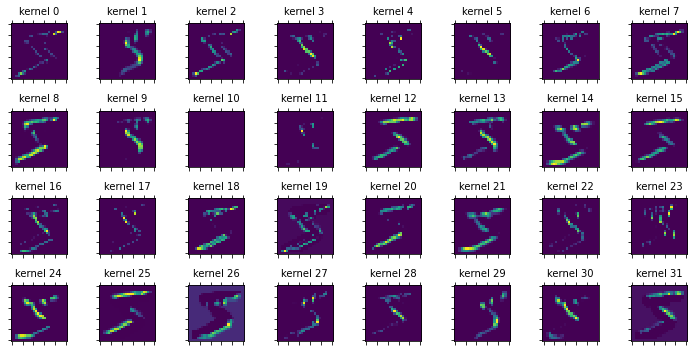

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

&rarr; 출력 이미지의 특징이 조금씩 차이가 있는 것을 볼 수 있음  
&rarr; 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할을 함
- 두 번째 레이어는 최대 풀링 레이어

In [ ]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


- 각 커널별로 출력되는 특성맵 이미지 시각화

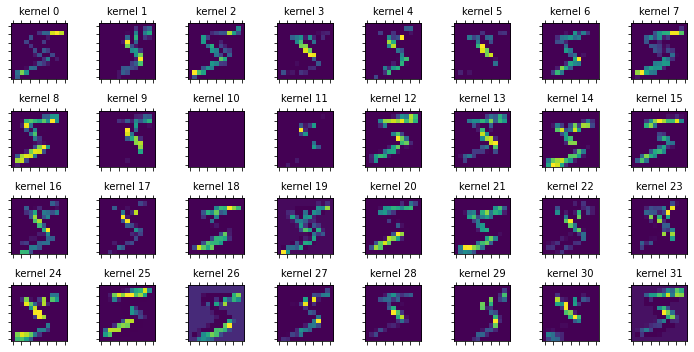

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

&rarr; 앞서 Conv2D 출력 이미지에 비하여 화소 크기가 굵어진 것을 볼 수 있음  
&rarr; 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음

## **03. 복잡한 모델 생성**


### 3-1 데이터셋 준비

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)을 새로 만들어서 추가
    - y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열을 새로 만듦
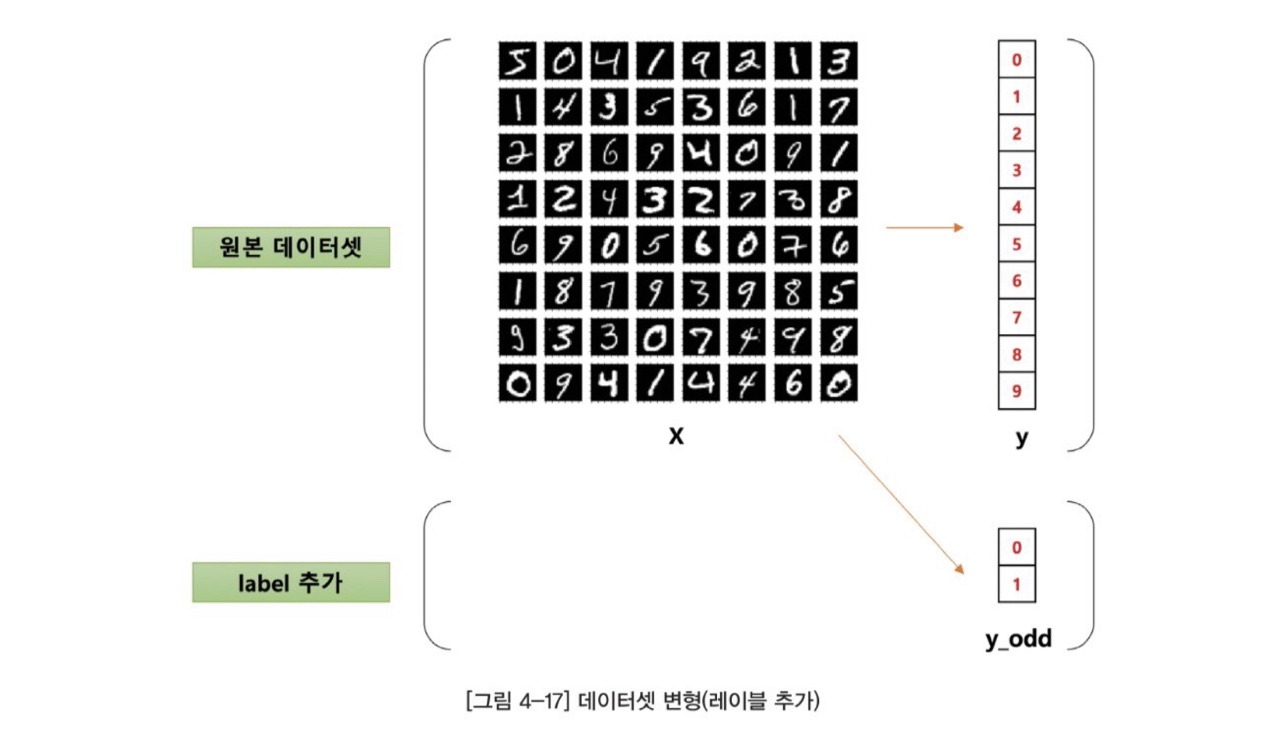

In [ ]:
# 새로운 출력 값 배열을 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

- 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


- 검증 데이터셋에 대해서도 홀수, 짝수를 나타내는 y_valid_odd 배열 만듦

In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 입력 이미지 데이터 255로 나눠서 정규화
- 색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정
    - expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축이 추가됨
    - 축의 인덱스로 -1을 지정했기 때문에 새로운 축은 끝에 추가됨

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성
- 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용됨. 따라서 입력 레이어는 2개의 출력을 갖게 됨
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되고, 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이어를 통과함. 이처럼 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있는 장점이 있음

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

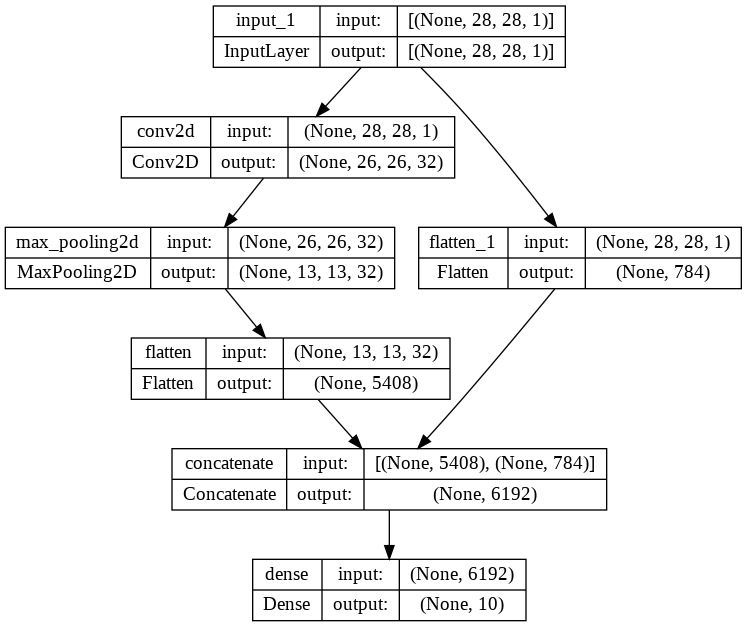

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

&rarr; 입력 레이어가 2개의 출력으로 나누어지고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인할 수 있음

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2034 - accuracy: 0.9431 - val_loss: 0.0808 - val_accuracy: 0.9767
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0632 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0610 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0548 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0565 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0558 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0544 -

&rarr; 정확도는 약 98%로서 앞에서 학습했던 Sequential 모델과 큰 차이는 없음

### 3-3 다중 출력 분류 모델
*0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드*
- 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심
- 즉, 다음 모델은 입력 이미지를 하나 받아서 해당 손글씨가 어떤 숫자인지를 분류하고 홀수인지 여부도 함께 분류하는 문제

In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


&rarr; 입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인됨

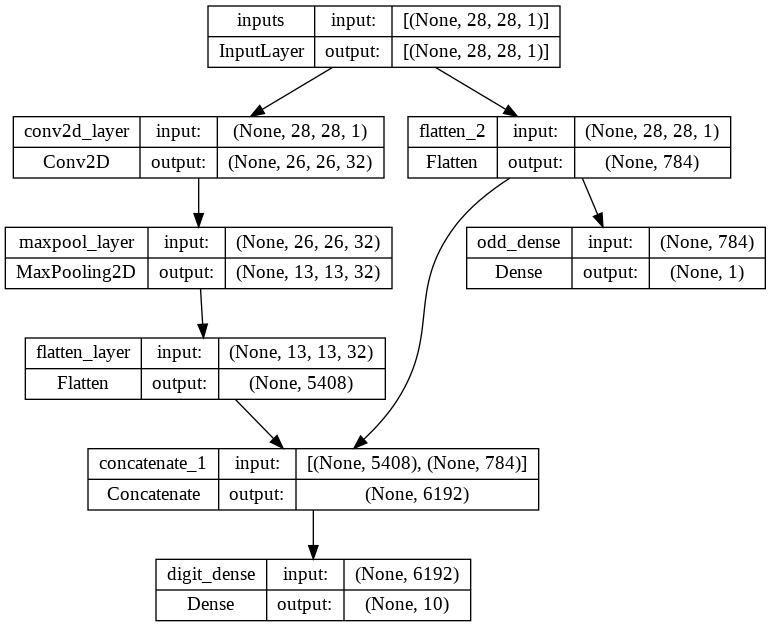

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 모델을 컴파일할 때 주의할 내용이 있음
- 모델을 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 'digit_dense', 'odd_dense'와 같은 이름을 지정한 것을 떠올려야 함
    - 여기서 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정함
- 모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함
    - 검증 데이터셋에 대해서도 마찬가지로 구분해 지정함

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5},
              # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid,
                                                               'odd_dense': y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3584 - digit_dense_loss: 0.1955 - odd_dense_loss: 0.3258 - digit_dense_accuracy: 0.9446 - odd_dense_accuracy: 0.8644 - val_loss: 0.2217 - val_digit_dense_loss: 0.0832 - val_odd_dense_loss: 0.2769 - val_digit_dense_accuracy: 0.9750 - val_odd_dense_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2104 - digit_dense_loss: 0.0745 - odd_dense_loss: 0.2718 - digit_dense_accuracy: 0.9782 - odd_dense_accuracy: 0.8909 - val_loss: 0.1972 - val_digit_dense_loss: 0.0648 - val_odd_dense_loss: 0.2648 - val_digit_dense_accuracy: 0.9791 - val_odd_dense_accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1899 - digit_dense_loss: 0.0585 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8956 - val_loss: 0.1928 - val_digit_dense_loss: 0.0597 - val_odd_dense_loss: 0.2660 - val_digit_dense_accuracy: 0.9808 -

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 8ms/step - loss: 0.1898 - digit_dense_loss: 0.0619 - odd_dense_loss: 0.2559 - digit_dense_accuracy: 0.9821 - odd_dense_accuracy: 0.9019


[0.1898355931043625,
 0.061897095292806625,
 0.2558768391609192,
 0.9821000099182129,
 0.9018999934196472]

&rarr; 숫자를 맞추는 문제는 98%의 정확도를 보인 반면, 홀수 여부를 판단하는 문제는 약 90%의 정확도를 보임

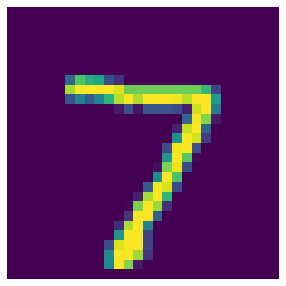

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

&rarr; 검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력하면 숫자 7에 대한 손글씨 이미지임

- 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률 구함
    - 첫 번째 예측 값: 10개 분류 레이블에 대한 확률
    - 두 번째 예측 값: 홀수일 확률
- 숫자 7 이미지에 대한 예측 확률 출력


In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 8ms/step
[1.0741300e-13 2.6143801e-11 6.6836980e-11 1.9049611e-07 2.4905295e-13
 3.5631821e-12 3.9419311e-20 9.9999970e-01 4.0796082e-09 3.0495368e-08]
[0.99954724]


- 넘파이 argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환

In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

&rarr; 첫 번째 이미지를 7로 예측함
- 홀수, 짝수 여부에 대한 예측 레이블 출력
    - 임계값(threshold)으로 0.5를 지정했는데, 홀수일 확률이 0.5보다 큰 경우 홀수로 분류하기로 함

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-31-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

&rarr; 첫 번째 이미지 7에 대하여 홀수(1)로 잘 분류함   
&rarr; 두 번째 샘플 이미지에 대해서는 숫자 2에 해당하는 짝수(0)로 정확하게 분류함

### 3-4 전이 학습(Transfer Learning)
: 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념
- 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있음

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


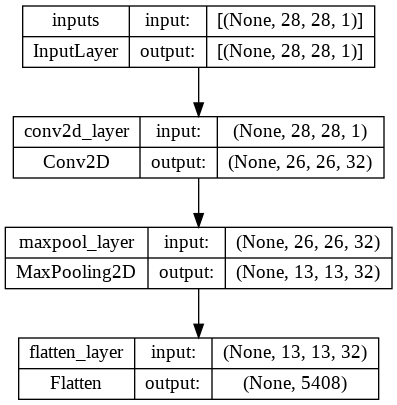

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

- Sequential API를 사용하여 앞에서 정의 base_model을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어 추가해 줌

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


&rarr; 총 파라미터 개수는 54,410개이고 모두 훈련이 가능하다고 표시되어 있음. 훈련이 가능하다는 뜻은 모델 훈련 시 파라미터 값이 업데이트됨

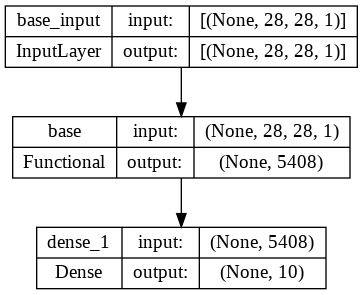

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

&rarr; 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가된 것을 확인할 수 있음

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1278 - accuracy: 0.9640 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0612 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0528 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0510 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0507 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0654 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0492 -

- 모델 인스턴스는 trainable 속성을 가지고 있음
    - False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이트되지 않음
- 이런 방식으로 base_model_frozen을 구성

In [ ]:
# 베이스 모델의 가중치를 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성해 보기
    - Sequential API로 구성하는 방식과의 차이점에 유의하기

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

&rarr; 총 파라미터의 개수는 54,410개이고 앞서 고정한 320개의 파라미터는 훈련이 불가능하다는 것이 표시되어 있음  
&rarr; 훈련 가능한 파라미터는 Flatten 레이어의 출력 5,408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당함. 즉, Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 된다는 뜻

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1146 - accuracy: 0.9689 - val_loss: 0.0575 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0560 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0507 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0595 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0548 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0505 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0559 - 

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능함

*Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 예제*

In [40]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                           outputs=base_model_output,
                                           name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델 구성

In [41]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                                            outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [42]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                  validation_data=(x_valid_in, y_valid), 
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1145 - accuracy: 0.9692 - val_loss: 0.0570 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.0515 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0508 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0503 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0617 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0516 - val_ac